# Text Classifier
## Raw Text

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 7

/Users/rutvikshah/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Getting the Data

In [2]:
data = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)

In [3]:
print("Train Dataset Dimensions : ",train_data.shape[0],train_labels.shape[0])
print("Test  Dataset Dimensions : ",test_data.shape[0],test_labels.shape[0])

Train Dataset Dimensions :  25000 25000
Test  Dataset Dimensions :  25000 25000


In [4]:
pd.DataFrame(train_data, columns=['Reviews'])

,Reviews
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,..."
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5..."
...,...
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,..."
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,..."
24999,"[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8..."


In [5]:
pd.DataFrame(test_data, columns=['Reviews'])

,Reviews
0,"[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5,..."
1,"[1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 267..."
2,"[1, 111, 748, 4368, 1133, 2, 2, 4, 87, 1551, 1..."
...,...
24997,"[1, 13, 1408, 15, 8, 135, 14, 9, 35, 32, 46, 3..."
24998,"[1, 11, 119, 241, 9, 4, 840, 20, 12, 468, 15, ..."
24999,"[1, 6, 52, 7465, 430, 22, 9, 220, 2594, 8, 28,..."


## Integer to Dictionary Values

In [6]:
dict_stamp = data.get_word_index()
dict_stamp = {k:(v+3) for k,v in dict_stamp.items()} 
dict_stamp["<PAD>"] = 0
dict_stamp["<START>"] = 1
dict_stamp["<UNK>"] = 2  
dict_stamp["<UNUSED>"] = 3

reverse_dict_stamp = dict([(value, key) for (key, value) in dict_stamp.items()])

def decode_review(text):
    return ' '.join([reverse_dict_stamp.get(i, '?') for i in text])

In [20]:
len(reverse_dict_stamp)

88588

In [7]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## Preprocessing

In [8]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [9]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,value=dict_stamp["<PAD>"],padding='post',maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,value=dict_stamp["<PAD>"],padding='post',maxlen=256)

In [10]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [11]:
print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

### Neural Network
##### Structure of the NNs:

### Model 
• Input Feature (Flattened/Linearised)<br>
• Hidden Dense Layer 1: Embedding Layer<br>
• Hidden Dense Layer 2: Pooling Layer<br>
• Hidden Dense Layer 3: Dense layer (AF : RELU)<br>
• Output Layer : Dense Layer (AF : SIGMOID)<br>

In [12]:
vocab_size = 10000
classifier = keras.Sequential()
classifier.add(keras.layers.Embedding(vocab_size, 16))
classifier.add(keras.layers.GlobalAveragePooling1D())
classifier.add(keras.layers.Dense(16, activation=tf.nn.relu))
classifier.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [13]:
classifier.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [15]:
history = classifier.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 208us/step - loss: 0.6912 - acc: 0.5623 - val_loss: 0.6881 - val_acc: 0.6440
Epoch 2/40
15000/15000 [==============================] - 2s 149us/step - loss: 0.6820 - acc: 0.6939 - val_loss: 0.6761 - val_acc: 0.7449
Epoch 3/40
15000/15000 [==============================] - 2s 149us/step - loss: 0.6647 - acc: 0.7567 - val_loss: 0.6560 - val_acc: 0.7540
Epoch 4/40
15000/15000 [==============================] - 2s 155us/step - loss: 0.6374 - acc: 0.7794 - val_loss: 0.6270 - val_acc: 0.7660
Epoch 5/40
15000/15000 [==============================] - 2s 160us/step - loss: 0.6003 - acc: 0.8011 - val_loss: 0.5888 - val_acc: 0.7974
Epoch 6/40
15000/15000 [==============================] - 2s 147us/step - loss: 0.5563 - acc: 0.8232 - val_loss: 0.5473 - val_acc: 0.8157
Epoch 7/40
15000/15000 [==============================] - 2s 158us/step - loss: 0.5093 - acc: 0.8429 - val_loss: 0.5054 - 

In [16]:
results = classifier.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 32us/step
[0.33417661135196686, 0.8714]


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

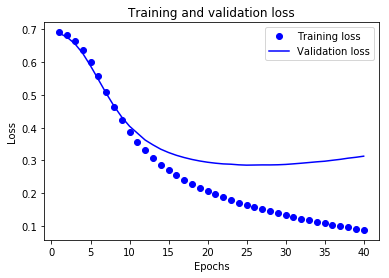

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

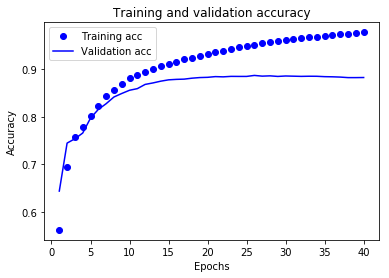

In [19]:
plt.clf() 
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()